# Exploratory Data Analysis

## Imports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import ast
from IPython.display import Image
import gc

In [89]:
gc.enable #enable automatic garbage collection

<function gc.enable()>

## Load the Data

In [90]:
listings = pd.read_csv('../listings_cleaned.csv')

In [91]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9277 entries, 0 to 9276
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9277 non-null   int64  
 1   listing_url                                   9277 non-null   object 
 2   name                                          9277 non-null   object 
 3   description                                   9116 non-null   object 
 4   neighborhood_overview                         6648 non-null   object 
 5   picture_url                                   9277 non-null   object 
 6   host_id                                       9277 non-null   int64  
 7   host_url                                      9277 non-null   object 
 8   host_name                                     9274 non-null   object 
 9   host_since                                    9274 non-null   o

In [92]:
#set to display all columns and rows
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [93]:
listings.head(3)

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,100%,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,3.0,"['email', 'phone', 'kba']",t,t,Mission Bay,32.78430,-117.25258,Entire condominium,Entire home/apt,6,1 bath,2.0,4.0,"['Stove', 'Smoke alarm', 'Refrigerator', 'Kitc...",2050.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,t,21,44,74,232,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,Michael,2010-05-21,"San Diego, California, United States",We love living part of the year in San Diego. ...,within an hour,100%,50%,f,https://a0.muscache.com/im/users/129123/profil...,https://a0.muscache.com/im/users/129123/profil...,Pacific Beach,7.0,7.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Pacific Beach,32.80724,-117.25630,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,"['Hot water', 'Smoke alarm', 'Kitchen', 'Hair ...",225.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,t,0,0,0,239,62,2,0,2010-07-09,2020-11-29,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,5,5,0,0,0.48
2,38245,https://www.airbnb.com/rooms/38245,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,Melinda,2010-07-12,"San Diego, California, United States",Hello Future and Returning Friends! It is Sp...,NaN,NaN,86%,f,https://a0.muscache.com/im/users/164137/profil...,https://a0.muscache.com/im/users/164137/profil...,Loma Portal,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Roseville,32.74202,-117.21870,Private room in house,Private room,1,1 shared bath,1.0,1.0,"['Hot water', 'Smoke alarm', 'Kitchen', 'First...",74.0,1,21,1.0,1.0,21.0,21.0,1.0,21.0,t,30,60,90,365,143,0,0,2010-09-09,2019-10-20,86.0,9.0,9.0,10.0,10.0,9.0,9.0,f,3,0,3,0,1.13


### Neighbourhood

In [94]:
gdf = gpd.read_file('../Data/neighbourhoods.geojson')
gdf.head()

,neighbourhood,neighbourhood_group,geometry
0,Amphitheater And Water Park,None,"MULTIPOLYGON (((-117.01452 32.58790, -117.0144..."
1,Bella Lago,None,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
2,Bonita Long Canyon,None,"MULTIPOLYGON (((-117.01149 32.66352, -117.0114..."
3,East Lake,None,"MULTIPOLYGON (((-116.99302 32.66040, -116.9816..."
4,Eastlake Trails,None,"MULTIPOLYGON (((-116.95512 32.64124, -116.9550..."


In [95]:
#drop neighbourhood_group column because it contains no values
gdf.drop(columns=['neighbourhood_group'],inplace=True)

In [96]:
#set neighbourhood name as index
gdf = gdf.set_index("neighbourhood")

In [97]:
#check Coordinate Reference System (CRS)
#WGS84 is geograhic which means coordinates are in latitude and longtitude
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

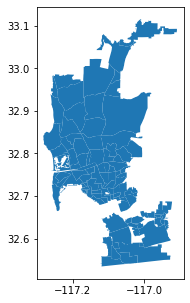

In [98]:
#plot neighbourhood map
f, ax = plt.subplots(1, figsize=(5, 5))
ax = gdf.plot(ax=ax)
plt.show()
plt.close('all')

## Explore the Data

### Neighbors

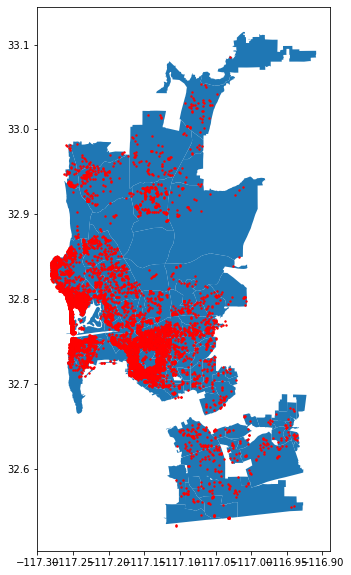

In [99]:
#plot neighbourhood map with listings overlay
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax)
ax.scatter(listings.longitude,listings.latitude, color='red',s=2)
plt.show()
plt.close('all')

In [100]:
#how many neighborhood on the map
len(gdf)

108

In [101]:
#how many neighbourhood with listings
listings.neighbourhood.nunique()

102

In [102]:
#create list of all neighbourhood
n1 = gdf.index.to_list();
#create list of unique neighbourhood in listings
n2 = list(set(listings.neighbourhood));
#find neighbourhood without any listings:
for e in n2:
    n1.remove(e)

In [103]:
#geodata for neighbourhood without listings
nolist = gdf.loc[n1]
nolist

,geometry
neighbourhood,
Bella Lago,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
Fenton St,"MULTIPOLYGON (((-116.97276 32.65658, -116.9715..."
Golf Course,"MULTIPOLYGON (((-116.96154 32.66878, -116.9615..."
Thomy Locust Pl,"MULTIPOLYGON (((-116.94151 32.62886, -116.9403..."
Village Center,"MULTIPOLYGON (((-116.97135 32.65287, -116.9710..."
Miramar,"MULTIPOLYGON (((-117.14291 32.83987, -117.1522..."


In [104]:
# create longitude and latitude columns
nolist['lat'] = np.nan
nolist['lat'] = np.nan

In [105]:
#Extract longitude and latitude
nolist['coords'] = nolist['geometry'].apply(lambda x: x.representative_point().coords[:])
for i in nolist['coords'].index:
    cor = nolist.coords[i]
    cord = cor[0]
    nolist.loc[i,['lat']] = cord[0]
    nolist.loc[i,['long']] = cord[1]
nolist

,geometry,lat,coords,long
neighbourhood,,,,
Bella Lago,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412...",-116.930536,"[(-116.9305357083142, 32.673207500000004)]",32.673208
Fenton St,"MULTIPOLYGON (((-116.97276 32.65658, -116.9715...",-116.960991,"[(-116.96099120698686, 32.652408)]",32.652408
Golf Course,"MULTIPOLYGON (((-116.96154 32.66878, -116.9615...",-116.955530,"[(-116.95552997060966, 32.6758465)]",32.675846
Thomy Locust Pl,"MULTIPOLYGON (((-116.94151 32.62886, -116.9403...",-116.936163,"[(-116.93616318629881, 32.6265035)]",32.626503
Village Center,"MULTIPOLYGON (((-116.97135 32.65287, -116.9710...",-116.968283,"[(-116.96828329699039, 32.6495815)]",32.649581
Miramar,"MULTIPOLYGON (((-117.14291 32.83987, -117.1522...",-117.141020,"[(-117.14102004474167, 32.8614635)]",32.861463


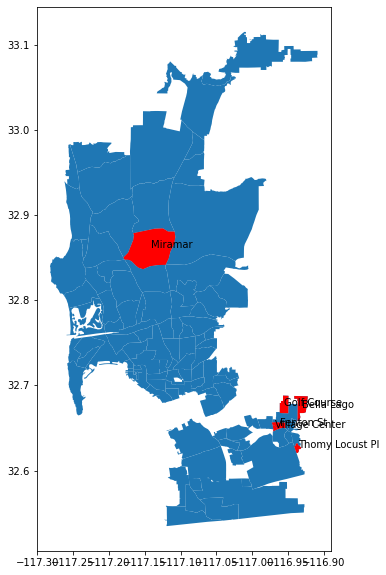

In [106]:
#where are these neighbourhood without listings
#plot all neighbourhood
f, ax = plt.subplots(1, figsize=(10,10))
gdf.plot(ax=ax)
#plot neighbourhood without lilstings
nolist.plot(ax=ax, color='red')
#add names
for x,y,label in zip(nolist.lat, nolist.long, nolist.index):
    plt.text(x,y,label)
plt.show()
plt.close('all')

In [107]:
#how many listings in each neighbourhood
listings.groupby('neighbourhood')['id'].count().sort_values(ascending=False)

neighbourhood
Mission Bay                    1441
Pacific Beach                   744
La Jolla                        660
East Village                    550
Ocean Beach                     432
Midtown                         427
North Hills                     421
Loma Portal                     232
Balboa Park                     211
Old Town                        187
Little Italy                    183
Gaslamp Quarter                 176
West University Heights         174
Mira Mesa                       159
University City                 149
Bay Park                        143
Grant Hill                      140
Park West                       134
Carmel Valley                   125
Normal Heights                  122
Core                            119
Clairemont Mesa                 114
Cortez Hill                     111
Marina                          107
Serra Mesa                      100
Linda Vista                      80
North Clairemont                 80
City Heights W

In [108]:
#average price by neighbourhood
avg_neigh_price = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

In [109]:
#add avergae price by neighbourhood into gdf
avg_neigh_price = avg_neigh_price.to_dict()
gdf =gdf.reset_index()
gdf['avg_price'] = gdf['neighbourhood'].map(avg_neigh_price)
gdf[['neighbourhood','avg_price']]

,neighbourhood,avg_price
0,Amphitheater And Water Park,50.000000
1,Bella Lago,NaN
2,Bonita Long Canyon,66.250000
3,East Lake,113.600000
4,Eastlake Trails,115.250000
5,Eastlake Vistas,131.888889
6,Eastlake Woods,127.500000
7,Estlake Greens,118.333333
8,Fenton St,NaN
9,Golf Course,NaN


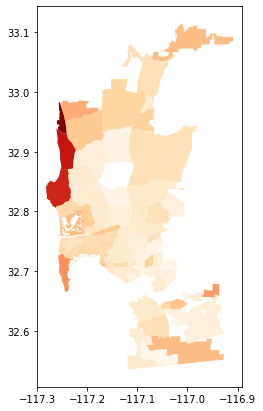

In [110]:
f, ax = plt.subplots(1, figsize=(7,7))
gdf.plot(column='avg_price',cmap='OrRd',ax=ax)
plt.show()
plt.close('all')

### Price

In [111]:
#take a look at the listing price
listings.price

0        2050.0
1         225.0
2          74.0
3          85.0
4          73.0
5          67.0
6          76.0
7          45.0
8          50.0
9          62.0
10        135.0
11        253.0
12        178.0
13        600.0
14        275.0
15         77.0
16         51.0
17        125.0
18         75.0
19         59.0
20         57.0
21         55.0
22        157.0
23         85.0
24        158.0
25         77.0
26         89.0
27        300.0
28        109.0
29        149.0
30        156.0
31        112.0
32        196.0
33        468.0
34        525.0
35         78.0
36        159.0
37        770.0
38         60.0
39         89.0
40        149.0
41        185.0
42         61.0
43         88.0
44         99.0
45         79.0
46         69.0
47         79.0
48         89.0
49         89.0
50         65.0
51         65.0
52         85.0
53        235.0
54         95.0
55         62.0
56         82.0
57        115.0
58         65.0
59         99.0
60         90.0
61        159.0
62      

In [112]:
listings.price.describe()

count     9277.000000
mean       237.292659
std        771.336599
min         20.000000
25%         88.000000
50%        135.000000
75%        238.000000
max      24999.000000
Name: price, dtype: float64

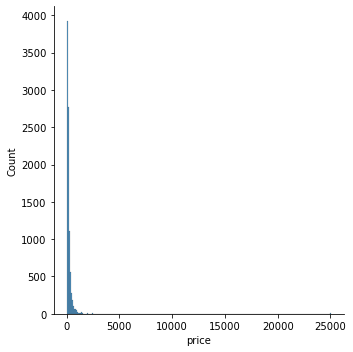

In [113]:
# plot a histogram of price
sns.displot(listings, x="price", binwidth=100)
plt.show()
plt.close('all')

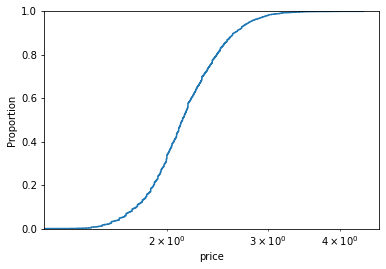

In [114]:
#plot CDF of price in log scale
sns.ecdfplot(listings.price, log_scale=True)
plt.show()
plt.close('all')

In [115]:
#since majority of the listing price is under $1000, lets look at that subset
listings_1000 = listings[listings.price <= 1000]
listings_1000.price.describe()

count    9114.000000
mean      187.249177
std       161.136801
min        20.000000
25%        87.000000
50%       132.000000
75%       228.000000
max      1000.000000
Name: price, dtype: float64

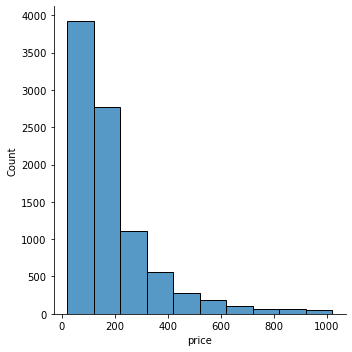

In [116]:
sns.displot(listings_1000, x="price", binwidth=100)
plt.show()
plt.close('all')

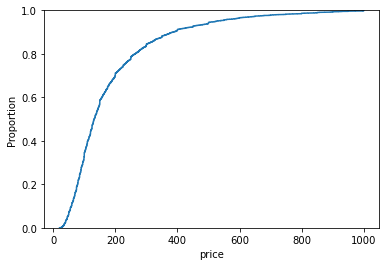

In [117]:
sns.ecdfplot(listings_1000.price)
plt.show()
plt.close('all')

### Amenities

In [118]:
#remembering from data wrangling notebook, convert amenities from string to list
amenities = []
for i in listings.amenities.index:
    amenities.insert(i, ast.literal_eval(listings.amenities[i]))
listings.amenities = amenities

In [119]:
#create a list of all amenities options - to use as column name for amenities dummies data
amen_cols=[]
for elem in amenities:
    amen_cols.extend(elem)
list(set(amen_cols))

['GE refrigerator',
 'Varies conditioner',
 'Outlet covers',
 '60" HDTV with Netflix, Amazon Prime Video, standard cable, premium cable',
 'Ginger Lily Farms Botanicals Island Tranquility Nourishing Body Wash, Softens, Nourishes and Cleans Skin, Natural Spa Quality, 100% Vegan and Cruelty-Free body soap',
 'HDTV',
 'Hair Food conditioner',
 'Dining area for 4 people',
 '55" HDTV with Amazon Prime Video, Netflix, Roku, HBO Max',
 'TV with standard cable',
 'Barbecue utensils',
 'Wifi – 300 Mbps',
 'Neutrogena conditioner',
 'Trader Joe\'s "Tea Tree Tingle" conditioner',
 'Refrigerator',
 'Marshal Stereo sound system with Bluetooth and aux',
 'Paid parking garage on premises – 2 spaces',
 'Garage parking',
 'LG refrigerator',
 'GE gas stove',
 '40" HDTV with standard cable',
 'Wet bar',
 'Paid parking lot on premises – 1 space',
 '62" HDTV with Netflix',
 'Microwave',
 'Stove',
 'SONOS Bluetooth sound system',
 'Kenmore refrigerator',
 'HDTV with Amazon Prime Video',
 'Bose sound system'

It looks like a lot of the emenities can be group together such as different TV options, shampoo options, wifi options, etc. May be there are ementities that are repeated more often than others?

In [120]:
#count different amenities
from collections import Counter
d = Counter(amen_cols)
amen_count = pd.DataFrame.from_dict(d, orient='index')

In [121]:
amen_count.sort_values(0, ascending=False)

,0
Wifi,9108
Essentials,8849
Smoke alarm,8779
TV,8310
Heating,8204
Hangers,8190
Kitchen,8182
Carbon monoxide alarm,8133
Long term stays allowed,7961
Hair dryer,7918


Knowing that our dataset contain 9277 listings total. Some of these amenities looks repeated and very uncommon. Those amenities that only occurs a handful of times in our entire dataset is unlikely to be helpful.

Let's check Airbnb website and see what the process of signing up for hosting looks like

![alt text](pic/amenities.png "Title")

![alt text](pic/amenities2.png "Title")

In [122]:
#based on Airbnb website process, manual select amenities
manual_amen = ['Essentials','Wifi','TV','Heating','Air conditioning','Iron',
                 'Shampoo','Hair dryer','Breakfast','Dedicated workspace',
                 'Indoor fireplace','Hangers','Clothing storage: closet',
                 'Clothing storage: closet and dresser','Clothing storage: dresser and closet',
                 'Private entrance','Smoke alarm','Carbon monoxide alarm','First aid kit',
                 'Fire extinguisher','Lock on bedroom door','Hot tub','Kitchen','Pool','Gym',
                 'Washer','Dryer','Free parking on premises','Free street parking','Long term stays allowed']
len(manual_amen)

30

In [126]:
#selected amenities is a combination of most frequently occured amenities and selected amenities
amen_count = amen_count.reset_index()
amen_count = amen_count[amen_count[0]>1000]
amen_set = set(list(amen_count['index']) + manual_amen)
amen_set = sorted(amen_set)
len(amen_set)

55

In [127]:
#elem = df.amenities[0]

In [139]:
#create empty amenities dataframe with amenties as colum name and same index as listings
amenities = pd.DataFrame(index=df.index,columns = amen_set)
amenities = amenities.fillna(0)

In [140]:
#fill amenities dataframe with 1 for each ameniy that is available
for elem in df['amenities']:
    for i, x in enumerate(elem):
        if x in amen_set:
            amenities.loc[i,x] = 1     

In [145]:
#checking the amenities dataframe
amenities[amenities.Wifi.isnull() == False].head()

,Air conditioning,BBQ grill,Baking sheet,Bathtub,Beach essentials,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Clothing storage: closet,Clothing storage: closet and dresser,Clothing storage: dresser and closet,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Pack ’n Play/travel crib,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Shower gel,Single level home,Smoke alarm,Stove,TV,Washer,Wifi
0,0,1,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0,1
1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1
2,1,1,0,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1
3,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1
4,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1


### Hosts

In [37]:
hosts = listings.groupby('host_id')['id'].count()
hosts.sort_values(ascending=False)

host_id
88168913     168
122055416    151
175128252    123
3017970       93
104309976     83
147276739     78
29286398      68
38690778      59
359066913     59
130904349     53
113421970     51
10981379      48
8534462       47
1028043       40
9624153       40
37353287      39
64443919      38
22012010      38
113472947     36
43349223      36
301775154     36
126644161     35
4656446       33
121916709     31
111987545     30
11526857      30
8336938       29
47928015      28
8735628       27
263534443     27
2772383       26
874515        26
224859198     26
50603993      24
114838819     23
25519858      21
41417897      20
3547828       20
206500947     20
34959478      20
125444529     19
50526077      19
8184593       19
55287801      19
135271319     18
45608374      18
6558055       17
1105249       17
164739817     17
8875994       17
178836989     17
254447179     16
324368071     16
21713364      16
8959661       16
156086844     15
60373371      15
29990718      15
341259

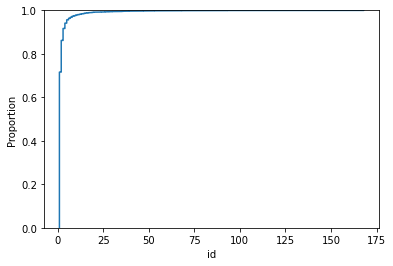

In [38]:
sns.ecdfplot(hosts)
plt.show()
plt.close('all')

Most hosts don't have more than 50 listings. 

In [39]:
#there are similar sounding columns in listings dataframe. Are they the same?
col = ['host_id','host_listings_count',
       'host_total_listings_count','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
       'calculated_host_listings_count']
hosts = listings[col]
hosts.head(5)

,host_id,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calculated_host_listings_count
0,8435,3.0,3.0,3,3,0,0,3
1,129123,7.0,7.0,5,5,0,0,5
2,164137,3.0,3.0,3,0,3,0,3
3,252692,5.0,5.0,2,1,1,0,2
4,302986,2.0,2.0,2,2,0,0,2


In [40]:
#Check host_id 88168913 
hosts[hosts.host_id == 88168913]

,host_id,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calculated_host_listings_count
1899,88168913,168.0,168.0,168,168,0,0,168
1900,88168913,168.0,168.0,168,168,0,0,168
1901,88168913,168.0,168.0,168,168,0,0,168
1902,88168913,168.0,168.0,168,168,0,0,168
1903,88168913,168.0,168.0,168,168,0,0,168
1904,88168913,168.0,168.0,168,168,0,0,168
1905,88168913,168.0,168.0,168,168,0,0,168
1906,88168913,168.0,168.0,168,168,0,0,168
1907,88168913,168.0,168.0,168,168,0,0,168
1908,88168913,168.0,168.0,168,168,0,0,168


In [41]:
#is host_listings_count the same as host_total_listings_count
listings[listings.host_listings_count != listings.host_total_listings_count]

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1868,14116320,https://www.airbnb.com/rooms/14116320,Modern La Jolla Escape,Take the ultimate vacation escape at this newl...,NaN,https://a0.muscache.com/pictures/ebd29bea-7591...,66115585,https://www.airbnb.com/users/show/66115585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,La Jolla,32.83401,-117.25341,Entire house,Entire home/apt,12,4.5 baths,4.0,5.0,"[Stove, Smoke alarm, Refrigerator, Kitchen, Ha...",1647.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
1869,14116330,https://www.airbnb.com/rooms/14116330,Villa Portofino,Look no further for luxury rental homes in Cal...,NaN,https://a0.muscache.com/pictures/db3ae972-b73f...,66115585,https://www.airbnb.com/users/show/66115585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,La Jolla,32.84583,-117.26151,Entire house,Entire home/apt,10,4.5 baths,4.0,4.0,"[Stove, Smoke alarm, Refrigerator, Kitchen, Ha...",3049.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
1870,14116332,https://www.airbnb.com/rooms/14116332,Forever Views,Set atop Soledad Mountain in the heart of Alta...,NaN,https://a0.muscache.com/pictures/ed1c026a-0fca...,66115585,https://www.airbnb.com/users/show/66115585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,La Jolla,32.82395,-117.24517,Entire house,Entire home/apt,11,4.5 baths,5.0,5.0,"[Stove, Smoke alarm, Refrigerator, Kitchen, Ha...",1708.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN


It seems that host_listings_count the same as host_total_listings_count. On top of that, we also find rows that contains no data

In [42]:
listings = listings[listings.host_listings_count == listings.host_total_listings_count]
listings = listings.drop(columns='host_total_listings_count')

In [43]:
#other listings count is not as revelvant, so drop them as well
col = ['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
       'calculated_host_listings_count']
listings = listings.drop(columns=col)

### Listings columns

In [44]:
listings.head(3)

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,100%,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,3.0,"['email', 'phone', 'kba']",t,t,Mission Bay,32.78430,-117.25258,Entire condominium,Entire home/apt,6,1 bath,2.0,4.0,"[Stove, Smoke alarm, Refrigerator, Kitchen, Ha...",2050.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,t,21,44,74,232,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,29967,https://www.airbnb.com/rooms/29967,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,Michael,2010-05-21,"San Diego, California, United States",We love living part of the year in San Diego. ...,within an hour,100%,50%,f,https://a0.muscache.com/im/users/129123/profil...,https://a0.muscache.com/im/users/129123/profil...,Pacific Beach,7.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Pacific Beach,32.80724,-117.25630,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,"[Hot water, Smoke alarm, Kitchen, Hair dryer, ...",225.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,t,0,0,0,239,62,2,0,2010-07-09,2020-11-29,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.48
2,38245,https://www.airbnb.com/rooms/38245,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,Melinda,2010-07-12,"San Diego, California, United States",Hello Future and Returning Friends! It is Sp...,NaN,NaN,86%,f,https://a0.muscache.com/im/users/164137/profil...,https://a0.muscache.com/im/users/164137/profil...,Loma Portal,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Roseville,32.74202,-117.21870,Private room in house,Private room,1,1 shared bath,1.0,1.0,"[Hot water, Smoke alarm, Kitchen, First aid ki...",74.0,1,21,1.0,1.0,21.0,21.0,1.0,21.0,t,30,60,90,365,143,0,0,2010-09-09,2019-10-20,86.0,9.0,9.0,10.0,10.0,9.0,9.0,f,1.13


In [45]:
#dropped columns that likely doesn't effect pricing
col = ['name','listing_url','picture_url', 'host_url', 'host_name', 'host_since', 
       'host_thumbnail_url', 'host_picture_url', 'host_verifications',
       'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'last_review']
listings = listings.drop(columns = col)
listings.head(3)

,id,description,neighborhood_overview,host_id,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,5570,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,8435,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,100%,f,Mission Beach,3.0,t,t,Mission Bay,32.78430,-117.25258,Entire condominium,Entire home/apt,6,1 bath,2.0,4.0,"[Stove, Smoke alarm, Refrigerator, Kitchen, Ha...",2050.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,29967,"This 2 bedroom, 2 full bathroom home offers al...",NaN,129123,"San Diego, California, United States",We love living part of the year in San Diego. ...,within an hour,100%,50%,f,Pacific Beach,7.0,t,t,Pacific Beach,32.80724,-117.25630,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,"[Hot water, Smoke alarm, Kitchen, Hair dryer, ...",225.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,62,2,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.48
2,38245,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",164137,"San Diego, California, United States",Hello Future and Returning Friends! It is Sp...,NaN,NaN,86%,f,Loma Portal,3.0,t,t,Roseville,32.74202,-117.21870,Private room in house,Private room,1,1 shared bath,1.0,1.0,"[Hot water, Smoke alarm, Kitchen, First aid ki...",74.0,1,21,1.0,1.0,21.0,21.0,1.0,21.0,143,0,0,86.0,9.0,9.0,10.0,10.0,9.0,9.0,f,1.13


In [46]:
#reformat data true/false columns
TF_dic = {'f': False, 't':True}
listings.host_is_superhost = listings.host_is_superhost.replace(TF_dic)
listings.host_has_profile_pic = listings.host_has_profile_pic.replace(TF_dic)
listings.host_identity_verified = listings.host_identity_verified.replace(TF_dic)
listings.instant_bookable = listings.instant_bookable.replace(TF_dic)

In [47]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9276
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9274 non-null   int64  
 1   description                  9113 non-null   object 
 2   neighborhood_overview        6648 non-null   object 
 3   host_id                      9274 non-null   int64  
 4   host_location                9260 non-null   object 
 5   host_about                   6489 non-null   object 
 6   host_response_time           8146 non-null   object 
 7   host_response_rate           8146 non-null   object 
 8   host_acceptance_rate         8657 non-null   object 
 9   host_is_superhost            9274 non-null   bool   
 10  host_neighbourhood           8323 non-null   object 
 11  host_listings_count          9274 non-null   float64
 12  host_has_profile_pic         9274 non-null   bool   
 13  host_identity_veri

In [48]:
#convert some of the object column into boolean
#whether this listing has or doesn't have this info filled out
df = listings
df['description'] = listings.description.notnull()
df['neighborhood_overview'] = listings.neighborhood_overview.notnull()
df['host_about'] = listings.host_about.notnull()

In [49]:
#look at host_response_time column
df.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [50]:
#look at room type
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [51]:
#convert categories into number
response_time_dic = {'within an hour':0, 'within a few hours':1, 'within a day':2,
       'a few days or more':3}
room_type_dic = {'Entire home/apt':0, 'Private room':1, 'Hotel room':2, 'Shared room':3}

df['host_response_time'] = listings.host_response_time.replace(response_time_dic)
df['room_type'] = listings.room_type.replace(room_type_dic)

In [52]:
#look at property type
df.property_type.unique()

array(['Entire condominium', 'Entire bungalow', 'Private room in house',
       'Entire guesthouse', 'Entire guest suite', 'Entire apartment',
       'Private room in condominium', 'Entire bed and breakfast',
       'Entire townhouse', 'Entire house', 'Private room in apartment',
       'Entire cottage', 'Private room in bungalow',
       'Private room in cottage', 'Private room in treehouse', 'Boat',
       'Private room', 'Treehouse', 'Entire loft', 'Entire villa',
       'Room in hostel', 'Shared room in house',
       'Private room in townhouse', 'Private room in loft',
       'Private room in bed and breakfast', 'Private room in tiny house',
       'Shared room in hostel', 'Entire cabin',
       'Shared room in apartment', 'Entire serviced apartment',
       'Entire place', 'Tiny house', 'Room in hotel',
       'Private room in hostel', 'Private room in guest suite',
       'Camper/RV', 'Private room in guesthouse',
       'Shared room in bed and breakfast', 'Barn',
       'Privat

In [53]:
#it seems like property type has some room type information baked within. Build a dictionary to re-categorize
a = [['Entire condominium','Shared room in condominium','Private room in condominium'],
['Entire bungalow','Private room in bungalow','Shared room in bungalow'],
['Private room in house','Entire house','Shared room in house','Private room in casa particular','Private room','Entire place'],
['Entire guesthouse','Private room in guesthouse','Shared room in guesthouse'],
['Entire guest suite','Private room in guest suite'],
['Entire apartment','Shared room in apartment','Private room in apartment'],
['Entire bed and breakfast','Shared room in bed and breakfast','Private room in bed and breakfast'],
['Entire townhouse','Private room in townhouse','Shared room in townhouse'],
['Entire cottage','Private room in cottage'],
['Private room in treehouse','Treehouse'],
['Boat'],
['Entire loft','Private room in loft','Shared room in loft'], 
['Entire villa','Private room in villa'],
['Room in hostel','Private room in hostel','Shared room in hostel'],
['Private room in tiny house','Tiny house'],
['Entire cabin'],
['Entire serviced apartment','Room in serviced apartment','Private room in serviced apartment'],
['Room in hotel','Shared room in hotel'],
['Camper/RV','Private room in camper/rv'],
['Barn'],
['Room in aparthotel','Shared room in aparthotel'],
['Shared room in tent','Private room in tent','Tent'],
['Room in boutique hotel','Shared room in boutique hotel'],
['Private room in cave','Cave'],
['Earth house','Private room in earth house'],
['Private room in resort','Entire resort'],
['Private room in tipi'],
['Private room in castle'],
['Farm stay'],
['Campsite']]
b = ['condominium','bungalow','house','guesthouse','guest suite','apartment',
      'bed and breakfast','townhouse','cottage','treehouse','boat','loft',
      'villa','hostel','tiny house','cabin','serviced apartment','hotel',
        'camper/RV','barn','aparthotel','tent','boutique hotel',
      'cave','earth house','resort','tipi','castle','farm stay','campsite']

temp_dict = {}
for idx1, val1 in enumerate(a):
    for indx2, val2 in enumerate(val1):
        key = val2
        value = b[idx1]
        temp_dict.update({key:value}) 
df['property_type'] = listings.property_type.replace(temp_dict)
print(df.property_type.unique())
print(len(df.property_type.unique()))

['condominium' 'bungalow' 'house' 'guesthouse' 'guest suite' 'apartment'
 'bed and breakfast' 'townhouse' 'cottage' 'treehouse' 'boat' 'loft'
 'villa' 'hostel' 'tiny house' 'cabin' 'serviced apartment' 'hotel'
 'camper/RV' 'barn' 'aparthotel' 'tent' 'boutique hotel' 'cave'
 'earth house' 'resort' 'tipi' 'castle' 'farm stay' 'campsite']
30


In [54]:
#build dictionary to convert property type to numerical 
keys = df.property_type.unique().tolist()
values = np.arange(0,len(df.property_type.unique()),1)
property_type_dict = dict(zip(keys, values))
df['property_type'] = listings.property_type.replace(property_type_dict)

In [55]:
#check out the current DataFrame
df.head(3)

,id,description,neighborhood_overview,host_id,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,5570,True,True,8435,"San Diego, California, United States",True,1.0,100%,100%,False,Mission Beach,3.0,True,True,Mission Bay,32.78430,-117.25258,0,0,6,1 bath,2.0,4.0,"[Stove, Smoke alarm, Refrigerator, Kitchen, Ha...",2050.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,29967,True,False,129123,"San Diego, California, United States",True,0.0,100%,50%,False,Pacific Beach,7.0,True,True,Pacific Beach,32.80724,-117.25630,1,0,8,2 baths,2.0,3.0,"[Hot water, Smoke alarm, Kitchen, Hair dryer, ...",225.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,62,2,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False,0.48
2,38245,True,True,164137,"San Diego, California, United States",True,NaN,NaN,86%,False,Loma Portal,3.0,True,True,Roseville,32.74202,-117.21870,2,1,1,1 shared bath,1.0,1.0,"[Hot water, Smoke alarm, Kitchen, First aid ki...",74.0,1,21,1.0,1.0,21.0,21.0,1.0,21.0,143,0,0,86.0,9.0,9.0,10.0,10.0,9.0,9.0,False,1.13


### Host neighbourhood

In [56]:
#is host_neighbourhood and listing neighbourhood the same?
print('No. of listings where hosts are in the same neighbourhood as the listings:',
      (len(df[df.host_neighbourhood == df.neighbourhood])))

No. of listings where hosts are in the same neighbourhood as the listings: 2933


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9276
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9274 non-null   int64  
 1   description                  9274 non-null   bool   
 2   neighborhood_overview        9274 non-null   bool   
 3   host_id                      9274 non-null   int64  
 4   host_location                9260 non-null   object 
 5   host_about                   9274 non-null   bool   
 6   host_response_time           8146 non-null   float64
 7   host_response_rate           8146 non-null   object 
 8   host_acceptance_rate         8657 non-null   object 
 9   host_is_superhost            9274 non-null   bool   
 10  host_neighbourhood           8323 non-null   object 
 11  host_listings_count          9274 non-null   float64
 12  host_has_profile_pic         9274 non-null   bool   
 13  host_identity_veri

In [58]:
df['host_in_SD'] = False
neigh = list(gdf.neighbourhood)
TF = []
for elem  in df.host_neighbourhood:
    TF.append(elem in neigh)
df['host_in_SD'] = TF
df[['host_neighbourhood','neighbourhood','host_in_SD']].sample(n = 5) 

,host_neighbourhood,neighbourhood,host_in_SD
4903,Golden Hill,Pacific Beach,False
6377,Pacific Beach,Pacific Beach,True
3477,Hillcrest,Old Town,False
2572,NaN,La Jolla,False
121,Pacific Beach,Pacific Beach,True


In [59]:
df.sample()

,id,description,neighborhood_overview,host_id,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_in_SD
8597,46142087,True,True,3773412,"San Diego, California, United States",True,1.0,100%,100%,False,Ocean Beach,0.0,True,True,Loma Portal,32.75305,-117.23501,0,0,2,2 baths,2.0,2.0,"[Smoke alarm, Kitchen, Hair dryer, Essentials,...",106.0,60,365,60.0,60.0,1125.0,1125.0,60.0,1125.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True


### Number of nights

In [60]:
night_cols = ['minimum_nights','maximum_nights','minimum_minimum_nights',
       'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
       'minimum_nights_avg_ntm','maximum_nights_avg_ntm']
nights = df.loc[:,night_cols]
nights.head(3)

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,3,365,3.0,3.0,365.0,365.0,3.0,365.0
1,4,365,4.0,4.0,365.0,365.0,4.0,365.0
2,1,21,1.0,1.0,21.0,21.0,1.0,21.0


In [61]:
nights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9276
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   minimum_nights          9274 non-null   int64  
 1   maximum_nights          9274 non-null   int64  
 2   minimum_minimum_nights  9274 non-null   float64
 3   maximum_minimum_nights  9274 non-null   float64
 4   minimum_maximum_nights  9274 non-null   float64
 5   maximum_maximum_nights  9274 non-null   float64
 6   minimum_nights_avg_ntm  9274 non-null   float64
 7   maximum_nights_avg_ntm  9274 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 652.1 KB


In [63]:
#plot pairplot 
plt.figure(figsize=(5,5));

<Figure size 360x360 with 0 Axes>

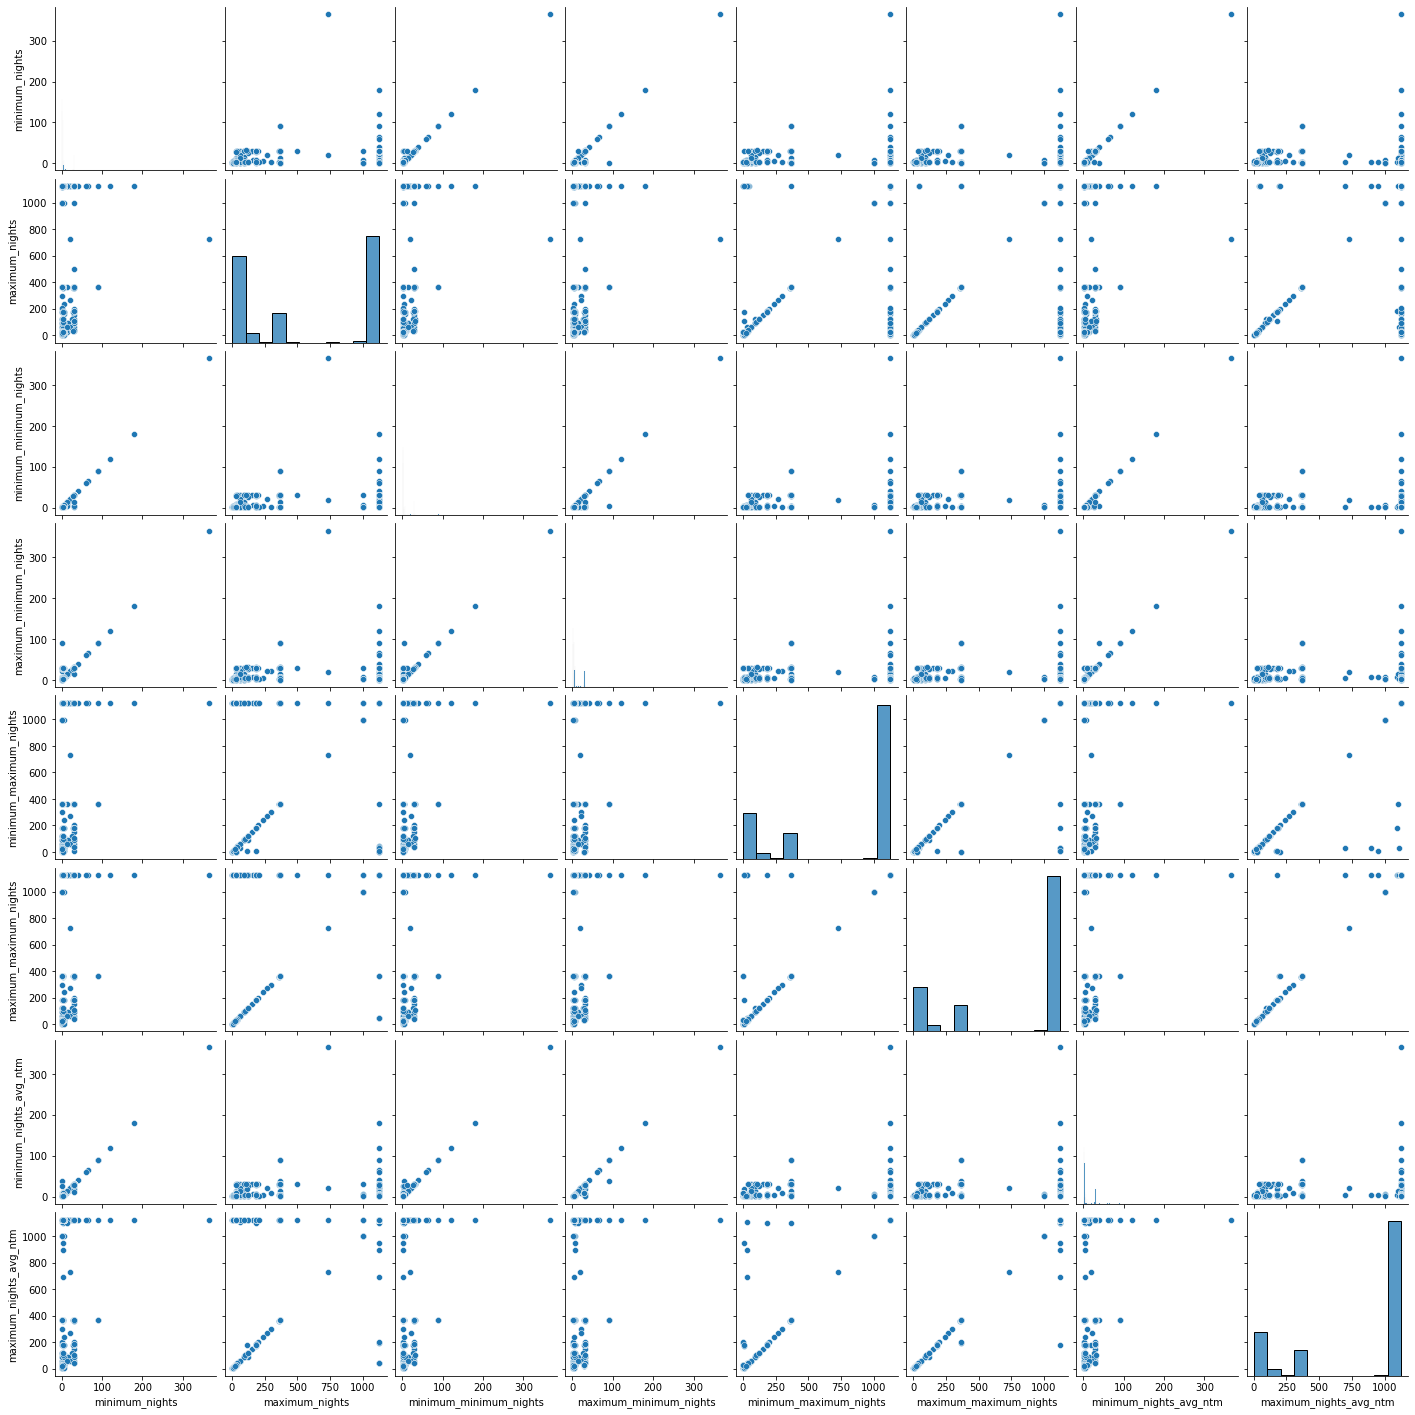

In [65]:
#plot only 10% of the data for quick results
sns_plot = sns.pairplot(nights.sample(frac=0.1));

In [66]:
#save plot into a file
sns_plot.savefig('nights_pairplot.png');
#clean pairplot firgure from sns
plt.close('all')
#show pairplot
#Image(filename = 'nights_pairplot.png') 

### Reviews

In [69]:
review_cols = ['number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month']
reviews = df.loc[:,review_cols]
reviews.head(3)

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62,2,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.48
2,143,0,0,86.0,9.0,9.0,10.0,10.0,9.0,9.0,1.13


In [70]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9276
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            9274 non-null   int64  
 1   number_of_reviews_ltm        9274 non-null   int64  
 2   number_of_reviews_l30d       9274 non-null   int64  
 3   review_scores_rating         7815 non-null   float64
 4   review_scores_accuracy       7770 non-null   float64
 5   review_scores_cleanliness    7771 non-null   float64
 6   review_scores_checkin        7767 non-null   float64
 7   review_scores_communication  7770 non-null   float64
 8   review_scores_location       7767 non-null   float64
 9   review_scores_value          7767 non-null   float64
 10  reviews_per_month            7858 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 869.4 KB


In [71]:
#plot pairplot 
plt.figure(figsize=(5,5));

<Figure size 360x360 with 0 Axes>

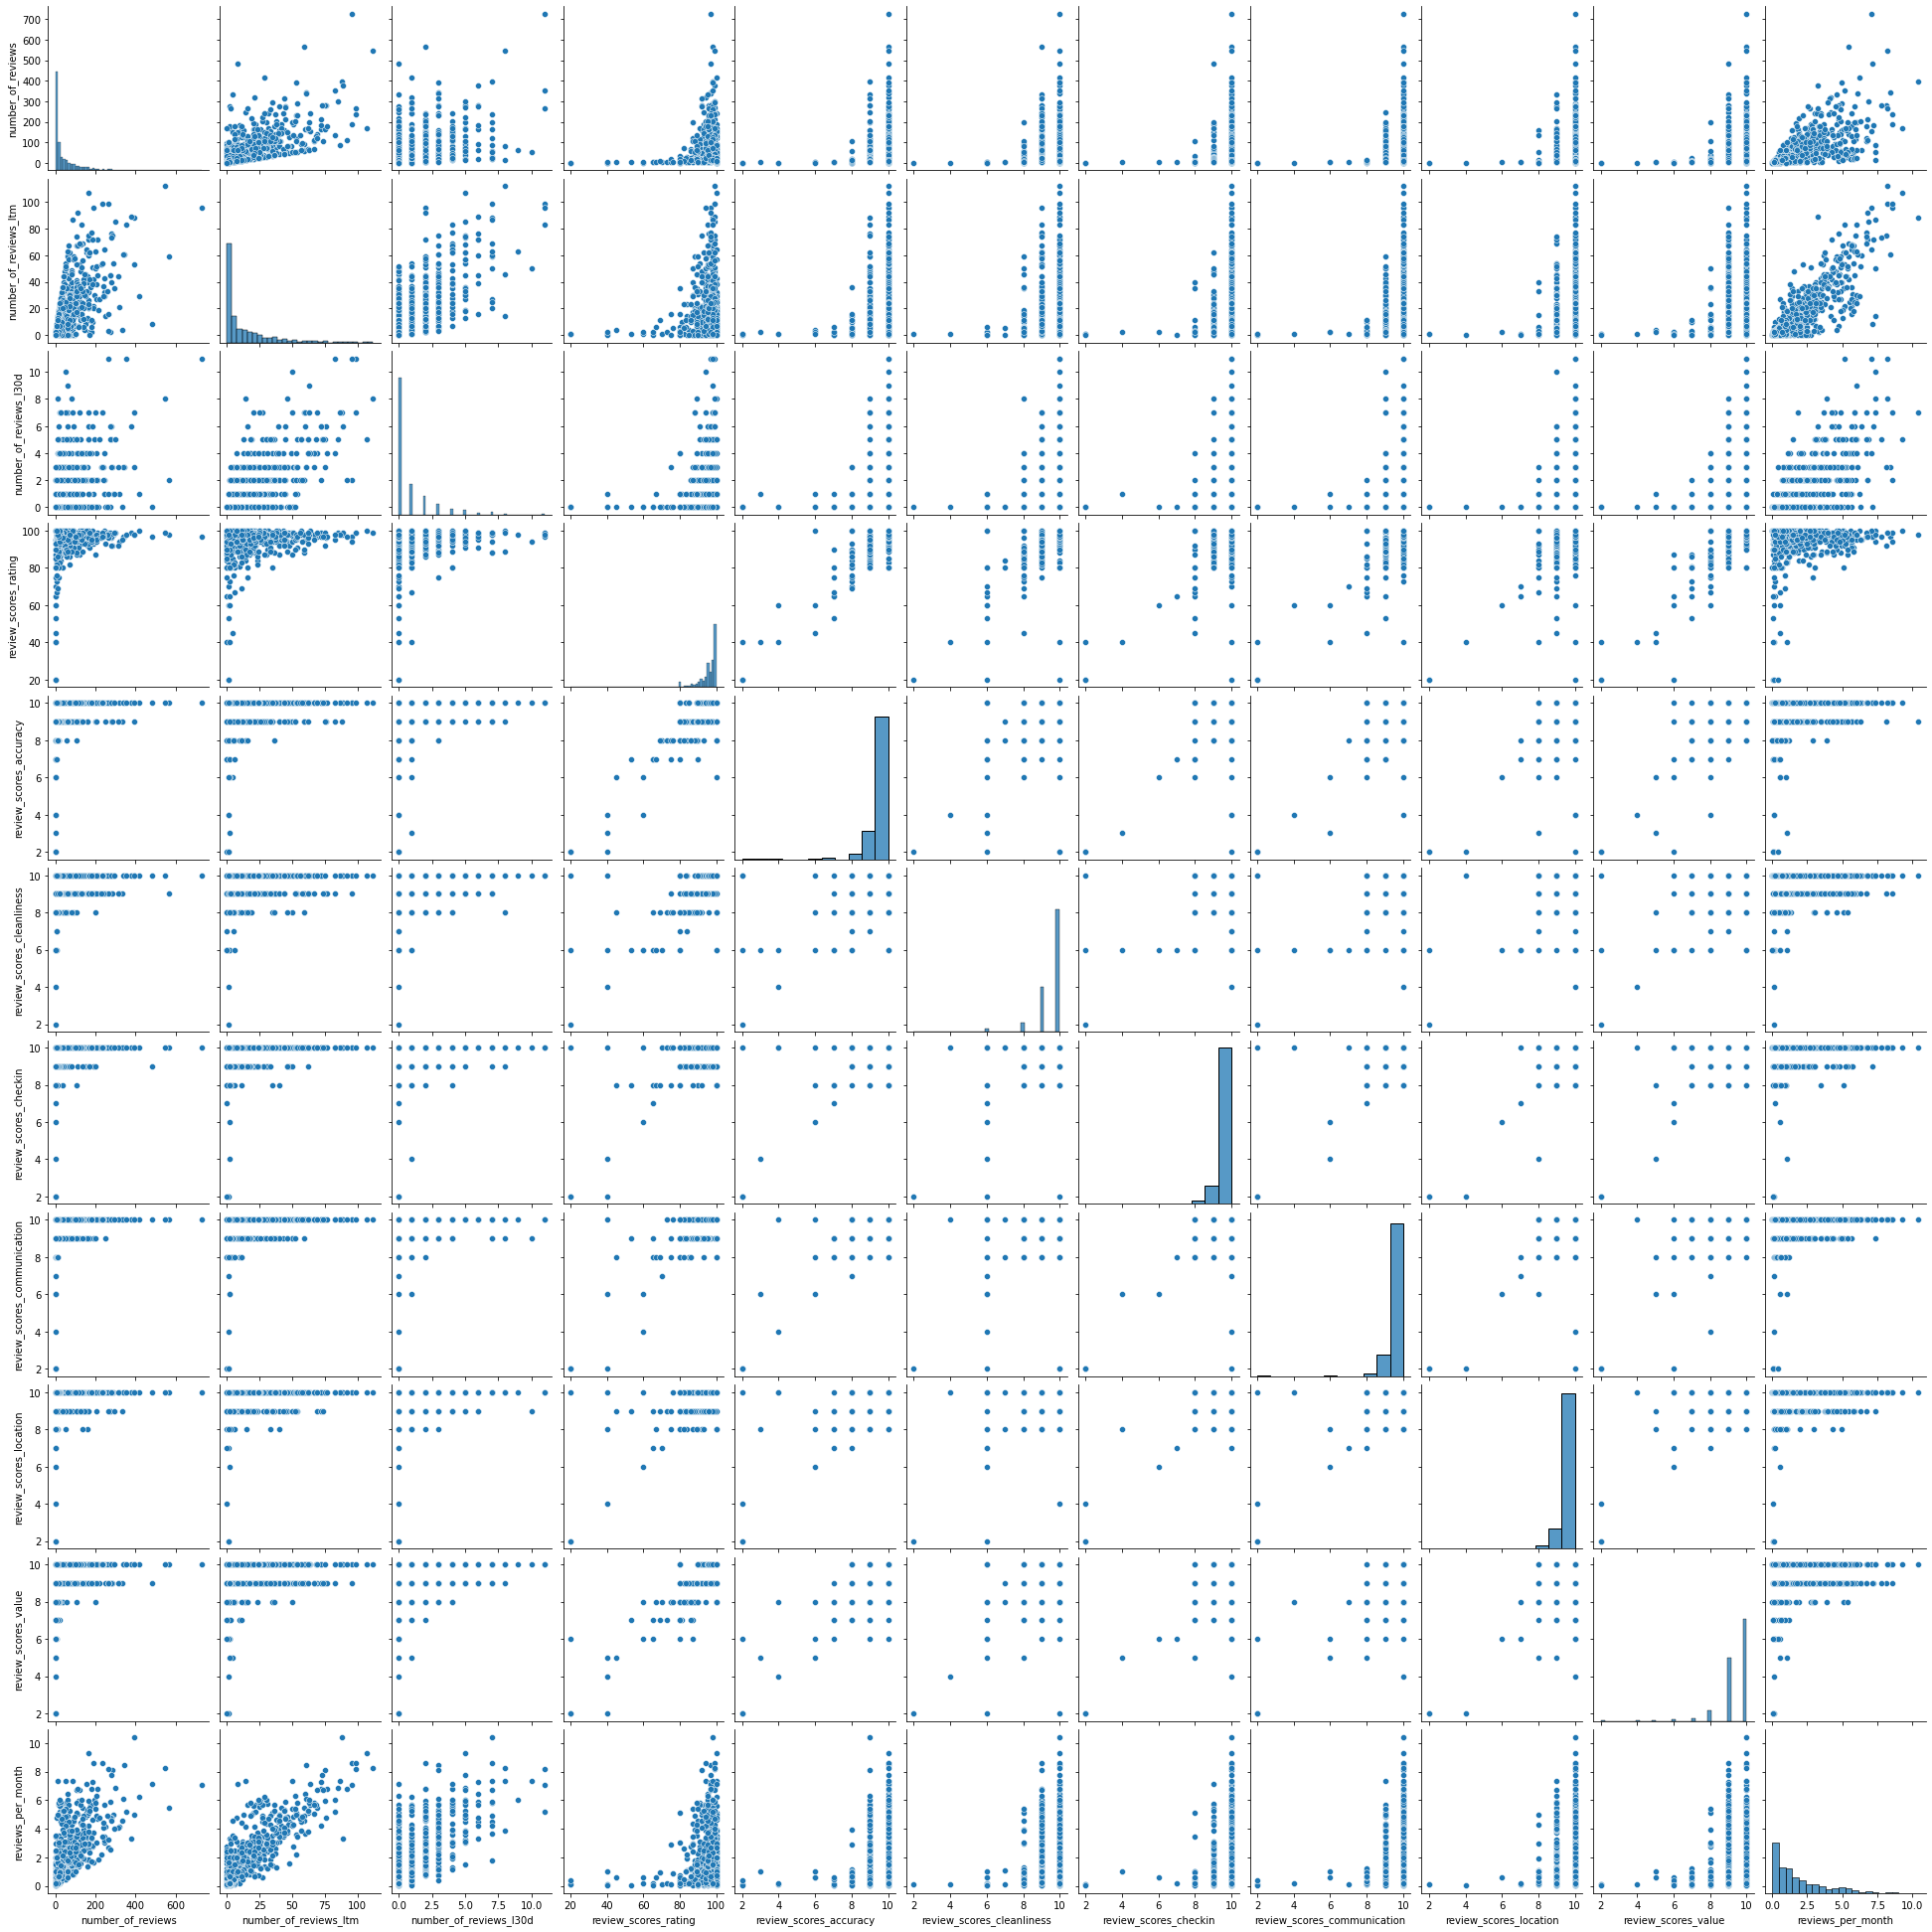

In [72]:
#plot only 10% of the data for quick results
sns_plot = sns.pairplot(reviews.sample(frac=0.1));

In [73]:
#save plot into a file
sns_plot.savefig('reviews_pairplot.png');
#clean pairplot firgure from sns
plt.close('all')
#show pairplot
#Image(filename = 'reviews_pairplot.png') 

## Save file

In [147]:
#combine and clean up the columns


In [ ]:
#save file
df.to_csv('../listings_cleaned_updated.csv', index=False)

In [ ]:
#reset options to defaults
pd.reset_option('max_columns')
pd.reset_option('max_rows')